# Data Analysis (Classification): Random Forest
Random Forest performs classification by creating decision trees on random subsets taking the average of all predictions.

## Import Libraries

In [1]:
# Import Required Modules and Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import sys

import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve,classification_report, confusion_matrix

In [2]:
cd

/root


## Load Data

In [3]:
# Upload the X and y Data
X = pd.read_csv('Project/Cleaned/Classification/X.csv', na_values = ['..'])
y = pd.read_csv('Project/Cleaned/Classification/y.csv', na_values = ['..'])
X_train = pd.read_csv('Project/Cleaned/Classification/X_train.csv', na_values = ['..'])
X_test = pd.read_csv('Project/Cleaned/Classification/X_test.csv', na_values = ['..'])
y_train = pd.read_csv('Project/Cleaned/Classification/y_train.csv', na_values = ['..'])
y_test = pd.read_csv('Project/Cleaned/Classification/y_test.csv', na_values = ['..'])

# Drop Column
X.drop(['Unnamed: 0'], axis=1, inplace=True)
y.drop(['Unnamed: 0'], axis=1, inplace=True)
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
y_train.drop(['Unnamed: 0'], axis=1, inplace=True)
y_test.drop(['Unnamed: 0'], axis=1, inplace=True)

# Load Dictionary
dictionary_series = np.load('Project/Cleaned/dictionary_series.npy',allow_pickle='TRUE').item()

In [4]:
# Shape of Train and Test Data
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

X_test: (999, 20)
y_test: (999, 1)
X_train: (3993, 20)
y_train: (3993, 1)


## Random Forest

In [5]:
# Create and Train Model
model_rf = RandomForestClassifier().fit(X_train, y_train.values.ravel())

# Model Prediction
y_prediction = model_rf.predict(X_test)

# Model Results
model_results = [['Score', model_rf.score(X_train, y_train.values.ravel())],
                 ['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_rf = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Value'])
model_results_rf

,Evaluation Metric,Value
0,Score,0.993739
1,Accuracy,0.971972


## Hyperparameter Tuning 

In [6]:
# Grid Search
model_rf = RandomForestClassifier()

n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

param_grid = dict(n_estimators=n_estimators,
                 max_features=max_features)

grid = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train.values.ravel())

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.9629336168958066
Best Params:  {'max_features': 'log2', 'n_estimators': 100}


## Random Forest with Grid Search Parameters

In [7]:
# Create and Train Model
model_rf = RandomForestClassifier(n_estimators = 100, max_features = 'sqrt').fit(X_train, y_train.values.ravel())

# Model Prediction
y_prediction = model_rf.predict(X_test)

# Model Results
model_results = [['Score', model_rf.score(X_train, y_train.values.ravel())],
                 ['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_rf = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Value'])
model_results_rf

,Evaluation Metric,Value
0,Score,0.993739
1,Accuracy,0.968969


## Cross-Validation

In [8]:
# Model Scores
model_scores = cross_val_score(model_rf, X, y.values.ravel(), cv=5)

print("Accuracy: %0.2f (+/- % 0.2f)" % (model_scores.mean(), model_scores.std() * 2))
print("CV Scores: ", model_scores)

Accuracy: 0.89 (+/-  0.03)
CV Scores:  [0.87787788 0.91491491 0.88677355 0.89078156 0.86472946]


## Feature Importance

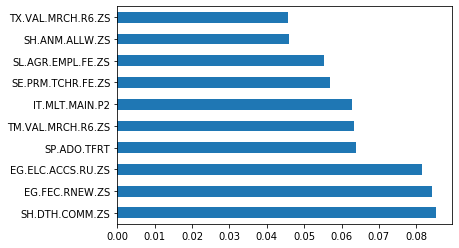

In [9]:
#Extra Trees Classifier
model_etc = ExtraTreesClassifier()
model_etc.fit(X,y.values.ravel())

# Feature Importances
feat_importances = pd.Series(model_etc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [10]:
# Feature Importance
model_featureimportance = pd.DataFrame({'feature': list(X_train.columns),
                                        'importance': model_rf.feature_importances_}).\
sort_values('importance', ascending = False)
model_featureimportance

,feature,importance
18,TM.VAL.MRCH.R6.ZS,0.114814
13,SH.DTH.COMM.ZS,0.106761
4,IT.MLT.MAIN.P2,0.105669
8,SE.PRM.TCHR.FE.ZS,0.066545
19,TX.VAL.MRCH.R6.ZS,0.063724
1,EG.ELC.ACCS.RU.ZS,0.057629
17,SP.ADO.TFRT,0.055619
3,EG.FEC.RNEW.ZS,0.055010
10,SE.SEC.ENRR,0.052960
12,SH.ANM.ALLW.ZS,0.041670


## Evaluating Model

In [11]:
# Statistics on Decision Trees in Random Forest
n_nodes = []
max_depths = []

for ind_tree in model_rf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Average maximum depth: {int(np.mean(max_depths))}')

# Training predictions (to demonstrate overfitting)
train_rf_predictions = model_rf.predict(X_train)
train_rf_probs = model_rf.predict_proba(X_train)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = model_rf.predict(X_test)
rf_probs = model_rf.predict_proba(X_test)[:, 1]

Average number of nodes: 460
Average maximum depth: 19


In [12]:
# Classification Report
classification_report_rf_table = classification_report(y_test,y_prediction, output_dict=True)
classification_report_rf_table = pd.DataFrame(classification_report_rf_table).transpose()
classification_report_rf_table

,precision,recall,f1-score,support
0,0.973352,0.983003,0.978154,706.000000
1,0.958042,0.935154,0.946459,293.000000
accuracy,0.968969,0.968969,0.968969,0.968969
macro avg,0.965697,0.959078,0.962307,999.000000
weighted avg,0.968862,0.968969,0.968858,999.000000


In [13]:
# Confusion Matrix
model_confusion_matrix_rf = confusion_matrix(y_test, y_prediction)
model_confusion_matrix_rf

array([[694,  12],
       [ 19, 274]])

Text(0.5, 257.44, 'Predicted label')

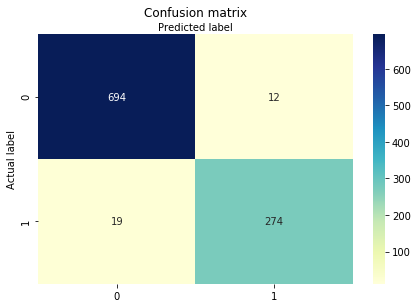

In [14]:
# Confusion Matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(model_confusion_matrix_rf))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heat Map
sns.heatmap(pd.DataFrame(model_confusion_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

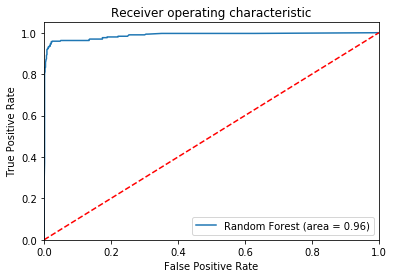

In [15]:
# ROC Curve
roc_auc_rf = roc_auc_score(y_test, model_rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()